In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
import nlopt
from statsrat.expr.predef.pvl_iti import blocking
from exemplar_models import *
from plotnine import *

In [2]:
save_plots = True
model = null
print(model.pars)

par_vals = {'null': [2.0, 1.0, 5.0]}

# The version of the task without ITIs requires differential attention to cs1 and cs2 in the experimental condition in order to produce blocking.
# The version with ITIs can produce blocking with equal attention, but the effect is weak (it works e.g. when decay_rate = 2.85).
# I believe the reason that the version with ITIs produces weak blocking even without differential attention is
# simply that in the blocking condition, the 'ctx' exemplar is present for longer, and thus is retrieved more strongly
# at test.  If I revised the experimental design to control for amount of time spent in the experimental context,
# this would no longer be the case.
# I would then need to rely on attention to CS 2 being greater in the control condition than in the
# experimental condition.

            min   max  default
decay_rate  0.0  10.0      0.5
nu          0.0  10.0      0.0
resp_scale  0.0  10.0      1.0


blocking 



/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_sel_atn_blocking_b_null.jpeg
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4.0 x 4.0 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/exemplar_sel_atn_blocking_r_null.jpeg


0.10080178671843942
       schedule      trial_name u_name  mean_resp
0       control  cs2 -> nothing     us   0.607302
0  experimental  cs2 -> nothing     us   0.506500


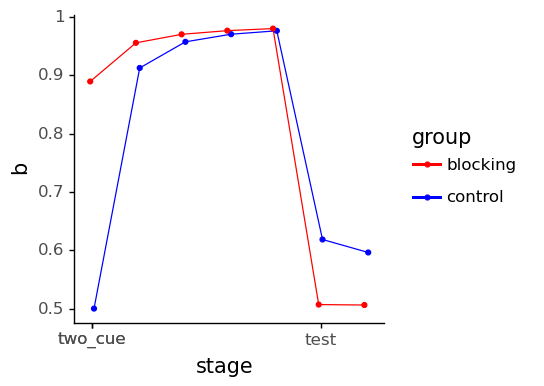

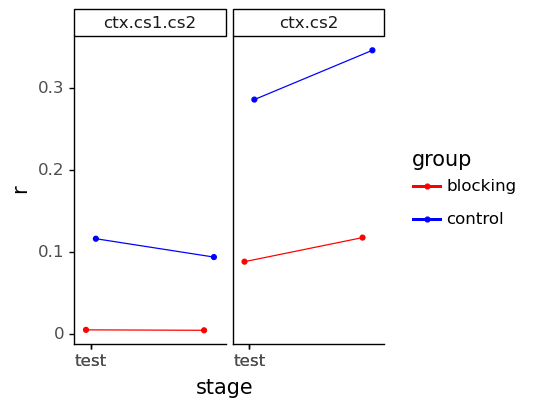

In [3]:
print('blocking \n')

# The version of the task without ITIs requires differential attention to cs1 and cs2 in order to produce blocking.
# The version with ITIs can produce blocking with equal attention, but the effect is weak (it works e.g. when decay_rate = 2.85).

trials = blocking.make_trials('experimental')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs1'] = 2.0
init_atn['cs2'] = 0.5
ds_exp = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

trials = blocking.make_trials('control')
init_atn = pd.DataFrame(0.001, index = trials.ex_names, columns = trials['x_name'].values)
init_atn['cs1'] = 1.0
init_atn['cs2'] = 1.0
ds_ctl = model.simulate(trials, init_atn = init_atn, par_val = par_vals[model.name])

plot_b = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'b',
                       rename_coords = {'schedule': 'group'},
                       rename_schedules = {'control': 'control', 'experimental': 'blocking'},
                       only_main = True,
                       draw_points = True,
                       sel = [{'t': ds_exp['stage_name'].isin(['two_cue', 'test'])}, None])
plot_b += scale_color_manual(values = {'blocking': 'red', 'control': 'blue'})
plot_b.draw()
if save_plots:
    plot_b.save(filename = 'plots/exemplar_sel_atn_blocking_b_' + model.name + '.jpeg', dpi = 500)
    
plot_r = sr.multi_plot(ds_list = [ds_exp, ds_ctl],
                       var = 'rtrv',
                       schedule_facet = False,
                       rename_coords = {'schedule': 'group', 'ex_name': 'exemplar'},
                       rename_schedules = {'control': 'control', 'experimental': 'blocking'},
                       only_main = True,
                       draw_points = True,
                       sel = [{'t': ds_exp['stage_name'] == 'test', 'ex_name': ['ctx.cs1.cs2', 'ctx.cs2']}, {'t': ds_ctl['stage_name'] == 'test', 'ex_name': ['ctx.cs1.cs2', 'ctx.cs2']}])
plot_r += ylab('r')
plot_r += scale_color_manual(values = {'blocking': 'red', 'control': 'blue'})
plot_r.draw()
if save_plots:
    plot_r.save(filename = 'plots/exemplar_sel_atn_blocking_r_' + model.name + '.jpeg', dpi = 500)
    
print(blocking.oats['blocking'].compute_total({'experimental': ds_exp, 'control': ds_ctl}))
print(blocking.oats['blocking'].mean_resp({'experimental': ds_exp, 'control': ds_ctl}))

In [4]:
#if model.name == 'grad_common':
#    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', sel = {'ex_name': ds_exp['ex_name'].values[0]}).draw()
#else:
#    sr.learn_plot(ds_exp, var = 'atn', color_var = 'x_name', facet_var = 'ex_name').draw()

In [5]:
#oat_result = sr.perform_oat(model = model, experiment = blocking)
#print(np.round(oat_result[0], 4))
#print(oat_result[1])